<a href="https://colab.research.google.com/github/VeronicaIovchik/Heartbeat_classification_challenge_final_project/blob/main/pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre Processing

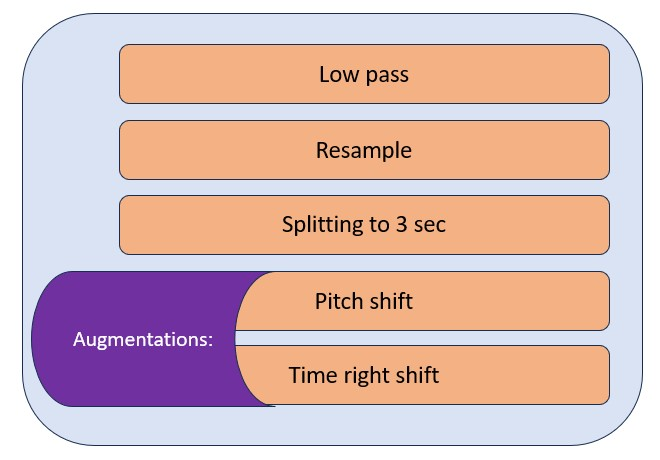

##Previous steps:<br>
[EDA](https://colab.research.google.com/drive/13IW8MXXF0mA_OdzKRmicp_WhywpF-Z9x?usp=sharing)<br>

#Load main libraries

In [ ]:
# generals
import os
import shutil
import pandas as pd
import numpy as np

# plots
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#audio
import wave
import IPython.display as ipd
import librosa
from scipy import signal
import soundfile as sf



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/Project/DATA_2

Mounted at /content/drive
/content/drive/MyDrive/Project/DATA_2


#Low Pass Filter

In [ ]:
def apply_low_pass(audio, sr, cutoff_freq=195, order=5):
    nyquist_freq = 0.5 * sr
    normalized_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = signal.butter(order, normalized_cutoff_freq, btype='low', analog=False)
    filtered_audio = signal.lfilter(b, a, audio)
    filtered_audio = np.asarray(filtered_audio, dtype=np.float32)
    return filtered_audio

In [ ]:
def low_pass_filter(input_folder,output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over the subfolders in the set folder
    subfolders = os.listdir(input_folder)
    for subfolder in subfolders:
      subfolder_path = os.path.join(input_folder, subfolder)
      if os.path.isdir(subfolder_path):
          output_subfolder_path = os.path.join(output_folder, subfolder)
          os.makedirs(output_subfolder_path, exist_ok=True)

          for filename in os.listdir(subfolder_path):
              if filename.endswith(".wav"):
                  file_path = os.path.join(subfolder_path, filename)
                  audio, sr = librosa.load(file_path, sr=None)

                  # Apply low-pass filter to the audio
                  audio_with_filter = apply_low_pass(audio, sr)

                  # Save the filtered audio to the new file path
                  output_filter_path = os.path.join(output_subfolder_path, filename)

                  sf.write(output_filter_path, audio_with_filter, sr)

                  print(f"Filtered audio saved to: {output_filter_path}")


In [ ]:
set_A_folder = "/content/drive/MyDrive/Project/DATA_2/set_A"
set_B_folder = "/content/drive/MyDrive/Project/DATA_2/set_B"
output_folder_A = "/content/drive/MyDrive/Project/DATA_2_filtered/set_A"
output_folder_B = "/content/drive/MyDrive/Project/DATA_2_filtered/set_B"

low_pass_filter(set_A_folder, output_folder_A)
low_pass_filter(set_B_folder, output_folder_B)

Filtered audio saved to: /content/drive/MyDrive/Project/DATA_2_filtered/set_A/Atraining_normal/Atraining_normal_201106221418.wav
Filtered audio saved to: /content/drive/MyDrive/Project/DATA_2_filtered/set_A/Atraining_normal/Atraining_normal_201106151236.wav
Filtered audio saved to: /content/drive/MyDrive/Project/DATA_2_filtered/set_A/Atraining_normal/Atraining_normal_201106210943.wav
Filtered audio saved to: /content/drive/MyDrive/Project/DATA_2_filtered/set_A/Atraining_normal/Atraining_normal_201104141251.wav
Filtered audio saved to: /content/drive/MyDrive/Project/DATA_2_filtered/set_A/Atraining_normal/Atraining_normal_201105151450.wav
Filtered audio saved to: /content/drive/MyDrive/Project/DATA_2_filtered/set_A/Atraining_normal/Atraining_normal_201104122156.wav
Filtered audio saved to: /content/drive/MyDrive/Project/DATA_2_filtered/set_A/Atraining_normal/Atraining_normal_201105021654.wav
Filtered audio saved to: /content/drive/MyDrive/Project/DATA_2_filtered/set_A/Atraining_normal/At

#Resample Dataset A

In [ ]:
def downsample_dataset_A(main_folder_path, output_folder_path):
    subfolders = os.listdir(main_folder_path)

    for subfolder in subfolders:
        subfolder_path = os.path.join(main_folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            output_subfolder_path = os.path.join(output_folder_path, subfolder)
            os.makedirs(output_subfolder_path, exist_ok=True)

            files = os.listdir(subfolder_path)
            for filename in files:
                file_path = os.path.join(subfolder_path, filename)
                if filename.endswith(".wav"):
                    output_file_path = os.path.join(output_subfolder_path, filename)

                    print(f"Processing: {filename}")

                    signal, sr = librosa.load(file_path, sr=None)
                    print(f"Original sampling rate: {sr}")

                    # Resample the audio
                    downsampled_signal =librosa.resample(signal, orig_sr=sr, target_sr=sr//10)

                    downsampled_sr = sr // 10
                    print(f"Downsampled sampling rate: {downsampled_sr}")

                    # Save the downsampled audio to the new file path
                    sf.write(output_file_path, downsampled_signal, downsampled_sr)
                    print(f"Saved downsampled file: {output_file_path}")

                    print()

In [ ]:
main_folder_path = '/content/drive/MyDrive/Project/DATA_2_filtered/set_A'
output_folder_path = '/content/drive/MyDrive/Project/DATA_2_filtered/set_A_resample'

downsample_dataset_A(main_folder_path, output_folder_path)


Processing: Atraining_normal_201106221418.wav
Original sampling rate: 44100
Downsampled sampling rate: 4410
Saved downsampled file: /content/drive/MyDrive/Project/DATA_2_filtered/set_A_resample/Atraining_normal/Atraining_normal_201106221418.wav

Processing: Atraining_normal_201106151236.wav
Original sampling rate: 44100
Downsampled sampling rate: 4410
Saved downsampled file: /content/drive/MyDrive/Project/DATA_2_filtered/set_A_resample/Atraining_normal/Atraining_normal_201106151236.wav

Processing: Atraining_normal_201106210943.wav
Original sampling rate: 44100
Downsampled sampling rate: 4410
Saved downsampled file: /content/drive/MyDrive/Project/DATA_2_filtered/set_A_resample/Atraining_normal/Atraining_normal_201106210943.wav

Processing: Atraining_normal_201104141251.wav
Original sampling rate: 44100
Downsampled sampling rate: 4410
Saved downsampled file: /content/drive/MyDrive/Project/DATA_2_filtered/set_A_resample/Atraining_normal/Atraining_normal_201104141251.wav

Processing: Atra

#Splitting to 3 seconds


In [ ]:
def split_audio(set_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over the subfolders in the set folder
    subfolders = os.listdir(set_folder)
    for subfolder in subfolders:
        subfolder_path = os.path.join(set_folder, subfolder)
        if os.path.isdir(subfolder_path):
            output_subfolder_path = os.path.join(output_folder, subfolder)
            os.makedirs(output_subfolder_path, exist_ok=True)

            # Get a list of all the audio files in the subfolder
            audio_files = [f for f in os.listdir(subfolder_path) if f.endswith('.wav')]

            for file in audio_files:
                input_file = os.path.join(subfolder_path, file)

                # Open the file
                with wave.open(input_file, 'rb') as audio:
                    sample_width = audio.getsampwidth()
                    frame_rate = audio.getframerate()

                    # Calculate the number of frames for a 3-second segment
                    segment_frames = int(frame_rate * 3)

                    # Calculate the total number of frames in the audio file
                    total_frames = audio.getnframes()

                    # Calculate the number of segments
                    num_segments = total_frames // segment_frames

                    # Ignore files that are less than 3 seconds long
                    if num_segments == 0:
                        print(f"Ignoring file {file} in subfolder {subfolder} as it is less than 3 seconds long")
                        continue

                    print(f"Splitting file {file} in subfolder {subfolder} into {num_segments} segments")

                    # Iterate over each segment
                    for segment in range(num_segments):
                        # Calculate the start and end frames for the segment
                        start_frame = segment * segment_frames
                        end_frame = (segment + 1) * segment_frames

                        # Read the segment frames from the input file
                        audio.setpos(start_frame)
                        segment_frames_data = audio.readframes(segment_frames)

                        # Create the output file name for the segment
                        output_file = os.path.join(output_subfolder_path, f"{file.split('.')[0]}_{segment}.wav")

                        # Delete the output file if it already exists
                        if os.path.exists(output_file):
                            os.remove(output_file)

                        # Create the output file and write the segment frames to it
                        with wave.open(output_file, 'wb') as segment_audio:
                            segment_audio.setnchannels(audio.getnchannels())
                            segment_audio.setsampwidth(sample_width)
                            segment_audio.setframerate(frame_rate)
                            segment_audio.writeframes(segment_frames_data)

                        print(f"Segment {segment} saved as {output_file}")

    print(f"Total records before splitting: {sum([len(files) for _, _, files in os.walk(set_folder)])}")
    print(f"Total records in the new folder: {sum([len(files) for _, _, files in os.walk(output_folder)])}")

In [ ]:
set_A_folder = "/content/drive/MyDrive/Project/DATA_2_filtered/set_A_resample"
set_B_folder = "/content/drive/MyDrive/Project/DATA_2_filtered/set_B"
output_folder_A = "/content/drive/MyDrive/Project/DATA_2_splitted/set_A"
output_folder_B = "/content/drive/MyDrive/Project/DATA_2_splitted/set_B"

split_audio(set_A_folder, output_folder_A)
split_audio(set_B_folder, output_folder_B)

Splitting file Atraining_normal_201106221418.wav in subfolder Atraining_normal into 2 segments
Segment 0 saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A/Atraining_normal/Atraining_normal_201106221418_0.wav
Segment 1 saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A/Atraining_normal/Atraining_normal_201106221418_1.wav
Splitting file Atraining_normal_201106151236.wav in subfolder Atraining_normal into 2 segments
Segment 0 saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A/Atraining_normal/Atraining_normal_201106151236_0.wav
Segment 1 saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A/Atraining_normal/Atraining_normal_201106151236_1.wav
Splitting file Atraining_normal_201106210943.wav in subfolder Atraining_normal into 1 segments
Segment 0 saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A/Atraining_normal/Atraining_normal_201106210943_0.wav
Splitting file Atraining_normal_201104141251.wav in subfolder Atraining_normal into 2 segm

#Augmentations (pitch + right time shift)

##Pitch Shift

In [ ]:
def pitch_shift(input_folder, output_folder):

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over the subfolders in the set folder
    subfolders = os.listdir(input_folder)
    for subfolder in subfolders:
      subfolder_path = os.path.join(input_folder, subfolder)
      if os.path.isdir(subfolder_path):
          output_subfolder_path = os.path.join(output_folder, subfolder)
          os.makedirs(output_subfolder_path, exist_ok=True)

          for filename in os.listdir(subfolder_path):
              if filename.endswith(".wav"):
                  audio_path = os.path.join(subfolder_path, filename)
                  y, sr = librosa.load(audio_path, sr=None)

                  # Pitch shifting
                  y_pitch_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=-1.5)

                  # Save the audio after Augmentations
                  output_augm_path = os.path.join(output_subfolder_path, f"{filename.split('.')[0]}_pitch.wav") #f"pitch_{filename}")

                  sf.write(output_augm_path, y_pitch_shifted, sr)
                  print(f"Pitch-shifted file {filename} saved as {output_augm_path}")



In [ ]:
input_folder = "/content/drive/MyDrive/Project/DATA_2_splitted/set_A"
output_folder = "/content/drive/MyDrive/Project/DATA_2_splitted/set_A_augm_1"
pitch_shift(input_folder, output_folder)

Pitch-shifted file Atraining_normal_201106221418_0.wav saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A_augm_1/Atraining_normal/Atraining_normal_201106221418_0_pitch.wav
Pitch-shifted file Atraining_normal_201106221418_1.wav saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A_augm_1/Atraining_normal/Atraining_normal_201106221418_1_pitch.wav
Pitch-shifted file Atraining_normal_201106151236_0.wav saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A_augm_1/Atraining_normal/Atraining_normal_201106151236_0_pitch.wav
Pitch-shifted file Atraining_normal_201106151236_1.wav saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A_augm_1/Atraining_normal/Atraining_normal_201106151236_1_pitch.wav
Pitch-shifted file Atraining_normal_201106210943_0.wav saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A_augm_1/Atraining_normal/Atraining_normal_201106210943_0_pitch.wav
Pitch-shifted file Atraining_normal_201104141251_0.wav saved as /content/drive/MyDriv

## Time Shift

In [ ]:
def time_shift(input_folder, output_folder):
 # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over the subfolders in the set folder
    subfolders = os.listdir(input_folder)
    for subfolder in subfolders:
      subfolder_path = os.path.join(input_folder, subfolder)
      if os.path.isdir(subfolder_path):
          output_subfolder_path = os.path.join(output_folder, subfolder)
          os.makedirs(output_subfolder_path, exist_ok=True)

          for filename in os.listdir(subfolder_path):
              if filename.endswith(".wav"):
                  audio_path = os.path.join(subfolder_path, filename)
                  y, sr = librosa.load(audio_path, sr=None)

                  # Apply the time shifting
                  shift = 2
                  shift = int(sr * shift)
                  y_time_shifted = np.roll(y, shift)
                  y_time_shifted[:shift] = 0 #In order not to cause distortion, we will reset this part

                  # Save the audio after Augmentations
                  output_augm_path = os.path.join(output_subfolder_path, f"{filename.split('.')[0]}_timeshift.wav")
                  sf.write(output_augm_path, y_time_shifted, sr)

                  print(f"Time-shifted file {filename} saved as {output_augm_path}")


                  # # Plot the waveforms
                  # plt.figure(figsize=(10, 6))
                  # plt.subplot(2, 1, 1)
                  # librosa.display.waveshow(y, sr=sr)
                  # plt.title("Original Signal")
                  # plt.subplot(2, 1, 2)
                  # librosa.display.waveshow(y_time_shifted, sr=sr, color='r')
                  # plt.title("Augmented Signal")
                  # plt.tight_layout()
                  # plt.show()

                  # # Plot the waveforms togther
                  # plt.figure(figsize=(10, 6))
                  # librosa.display.waveshow(y, sr=sr)
                  # librosa.display.waveshow(y_time_shifted, sr=sr, color='r')

                  # plt.show()

In [ ]:
input_folder = "/content/drive/MyDrive/Project/DATA_2_splitted/set_A"
output_folder = "/content/drive/MyDrive/Project/DATA_2_splitted/set_A_augm_2"
time_shift(input_folder, output_folder)

Time-shifted file Atraining_normal_201106221418_0.wav saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A_augm_2/Atraining_normal/Atraining_normal_201106221418_0_timeshift.wav
Time-shifted file Atraining_normal_201106221418_1.wav saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A_augm_2/Atraining_normal/Atraining_normal_201106221418_1_timeshift.wav
Time-shifted file Atraining_normal_201106151236_0.wav saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A_augm_2/Atraining_normal/Atraining_normal_201106151236_0_timeshift.wav
Time-shifted file Atraining_normal_201106151236_1.wav saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A_augm_2/Atraining_normal/Atraining_normal_201106151236_1_timeshift.wav
Time-shifted file Atraining_normal_201106210943_0.wav saved as /content/drive/MyDrive/Project/DATA_2_splitted/set_A_augm_2/Atraining_normal/Atraining_normal_201106210943_0_timeshift.wav
Time-shifted file Atraining_normal_201104141251_0.wav saved as /conten

In [ ]:
os.listdir("/content/drive/MyDrive/Project/DATA_2_splitted")

['set_A', 'set_B', 'set_A_augm_1']

#PLOTS

##Functions

In [ ]:
def plot_original_and_processed_signal_waveform(original_signal, processed_signal, sr0, sr1):
    fig, ax = plt.subplots(nrows=3)
    librosa.display.waveshow(original_signal, sr=sr0, ax=ax[0])
    ax[0].set(title="Original signal")

    librosa.display.waveshow(processed_signal, sr=sr1, color='r',ax=ax[1])
    ax[1].set(title="Processed signal")

    librosa.display.waveshow(original_signal, sr=sr0,ax=ax[2])
    librosa.display.waveshow(processed_signal, sr=sr1, color='r',ax=ax[2])
    ax[2].set(title="Original + Processed signal")
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_original_and_processed_melspec(original_signal, processed_signal, sr0, sr1, text_for_title):
    # Perform STFT on the signals
    D0 = librosa.stft(original_signal)
    D1 = librosa.stft(processed_signal)

    # Compute mel-frequency spectrograms
    S0 = librosa.feature.melspectrogram(S=np.abs(D0), sr=sr0, n_mels=128, fmax=8000)
    S1 = librosa.feature.melspectrogram(S=np.abs(D1), sr=sr1, n_mels=128, fmax=8000)

    # Convert to dB
    S_dB0 = librosa.amplitude_to_db(np.abs(S0), ref=np.max)
    S_dB1 = librosa.amplitude_to_db(np.abs(S1), ref=np.max)

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    img0 = librosa.display.specshow(S_dB0, x_axis='time', y_axis='mel', sr=sr0, fmax=8000, ax=ax[0])
    img1 = librosa.display.specshow(S_dB1, x_axis='time', y_axis='mel', sr=sr1, fmax=8000, ax=ax[1])
    fig.colorbar(img1, ax=ax, format='%+2.0f dB')
    ax[0].set(title='Original Mel-frequency spectrogram')
    ax[1].set(title=f'After {text_for_title} Mel-frequency spectrogram')
    # ax[0].set_ylim(0, 500)
    # ax[1].set_ylim(0, 500)
    fig.suptitle(f'{text_for_title}', x=0.45, fontsize=16)
    plt.show()

## NORMAL file

LOW PASS <br>
orig ---> Low Pass

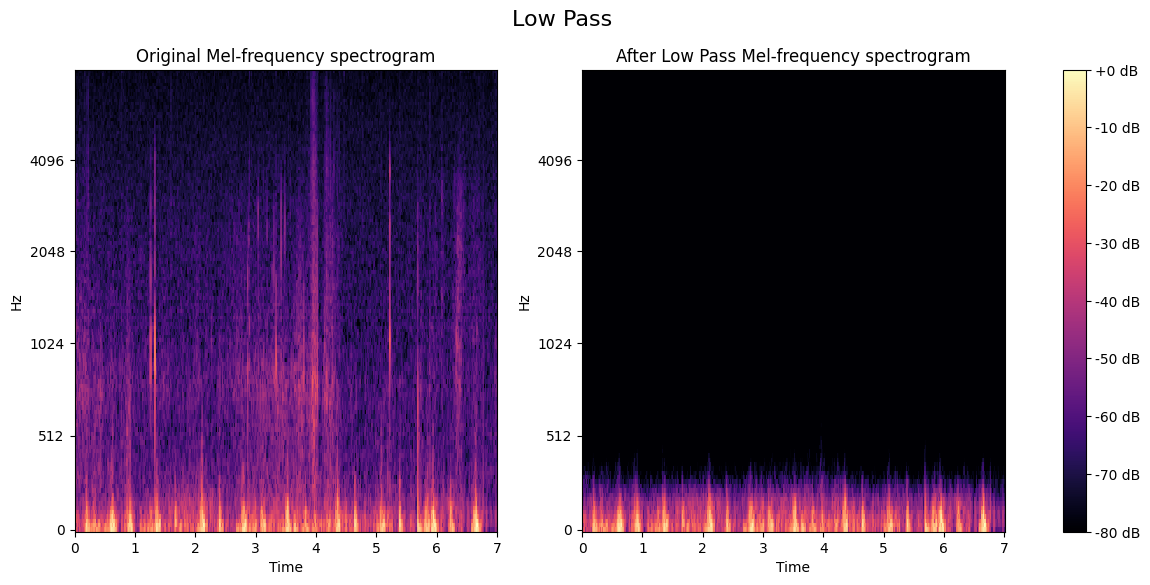

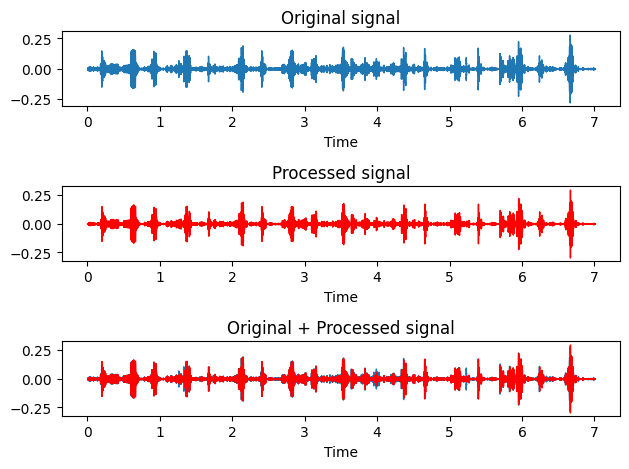

In [ ]:
Original_signal_path = "/content/drive/MyDrive/Project/DATA_2/set_A/Atraining_normal/Atraining_normal_201106221418.wav"
Processed_signal_path = "/content/drive/MyDrive/Project/DATA_2_filtered/set_A/Atraining_normal/Atraining_normal_201106221418.wav"

original_signal, sr0 = librosa.load(Original_signal_path, sr=None)
processed_signal, sr1 = librosa.load(Processed_signal_path, sr=None)

# print(original_signal)
# print(len(original_signal))
# print(sr0)
# print('')


# print(processed_signal)
# print(len(processed_signal))
# print(sr1)
# print('')

# print(original_signal==processed_signal)

text_for_title= "Low Pass"

plot_original_and_processed_melspec(original_signal, processed_signal, sr0, sr1, text_for_title)
plot_original_and_processed_signal_waveform(original_signal, processed_signal, sr0, sr1)


Low Pass ---> Resample

/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


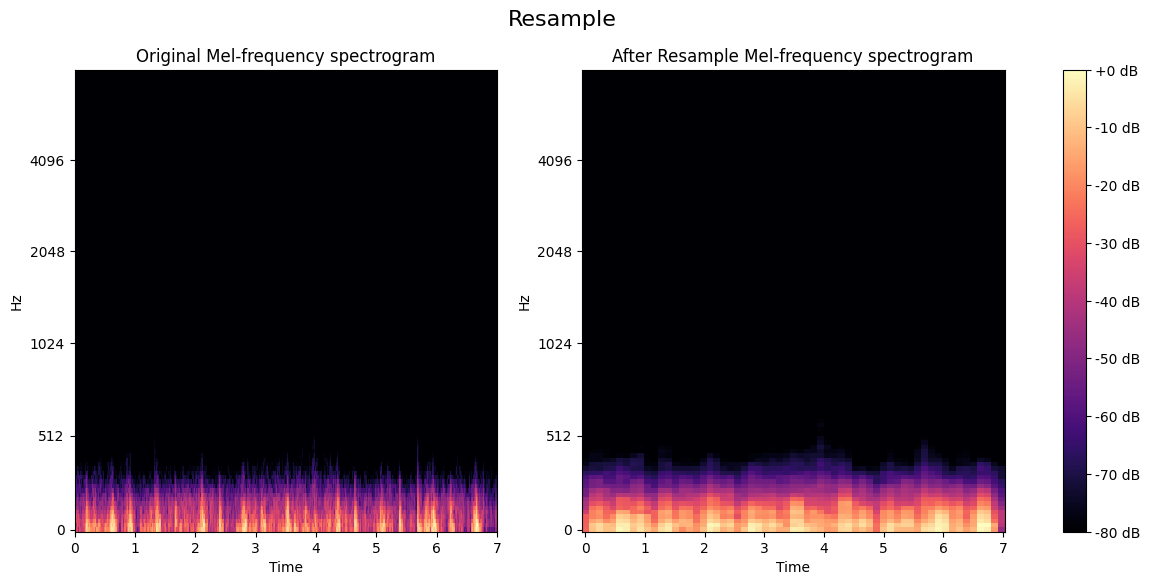

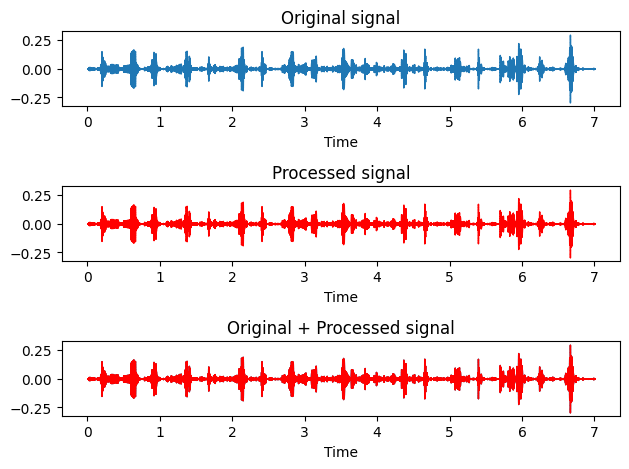

In [ ]:
Original_signal_path = "/content/drive/MyDrive/Project/DATA_2_filtered/set_A/Atraining_normal/Atraining_normal_201106221418.wav"
Processed_signal_path = "/content/drive/MyDrive/Project/DATA_2_filtered/set_A_resample/Atraining_normal/Atraining_normal_201106221418.wav"

original_signal, sr0 = librosa.load(Original_signal_path, sr=None)
processed_signal, sr1 = librosa.load(Processed_signal_path, sr=None)

# print(original_signal)
# print(len(original_signal))
# print(sr0)
# print('')


# print(processed_signal)
# print(len(processed_signal))
# print(sr1)
# print('')

# print(original_signal==processed_signal)

text_for_title= "Resample"
plot_original_and_processed_melspec(original_signal, processed_signal, sr0, sr1, text_for_title)
plot_original_and_processed_signal_waveform(original_signal, processed_signal, sr0, sr1)

splitting to 3 seconds - before the augmentation part, every audio splitted to parts of 3 secinds



In [ ]:
def plot_original_and_splitted_signal_waveform(original_signal, seg_0, seg_1, sr0, sr1):

    ax0 = plt.subplot2grid((3,3), (1,0), colspan=2)
    ax1 = plt.subplot2grid((3,3), (2,0))
    ax2 = plt.subplot2grid((3,3), (2,1))

    librosa.display.waveshow(original_signal, sr=sr0, ax=ax0)
    ax0.set(title="Original signal")
    librosa.display.waveshow(seg_0, sr=sr1, color='r',ax=ax1)
    ax1.set(title="seg1")

    librosa.display.waveshow(seg_1, sr=sr1,color='r',ax=ax2)
    ax2.set(title="seg2")
    ax2.axes.get_yaxis().set_visible(False)

    plt.tight_layout()
    plt.show()



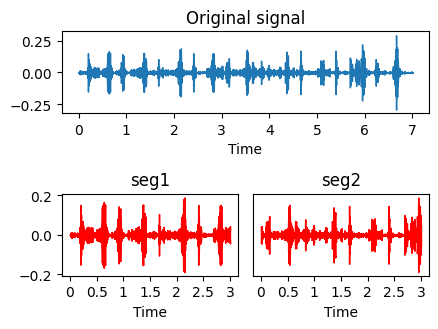

In [ ]:
original_signal_path = "/content/drive/MyDrive/Project/DATA_2_filtered/set_A_resample/Atraining_normal/Atraining_normal_201106221418.wav"
seg_0 = "/content/drive/MyDrive/Project/DATA_2_splitted/set_A/Atraining_normal/Atraining_normal_201106221418_0.wav"
seg_1 ="/content/drive/MyDrive/Project/DATA_2_splitted/set_A/Atraining_normal/Atraining_normal_201106221418_1.wav"

original_signal, sr0 = librosa.load(original_signal_path, sr=None)
seg_0, sr1 = librosa.load(seg_0, sr=None)
seg_1, sr1 = librosa.load(seg_1, sr=None)

plot_original_and_splitted_signal_waveform(original_signal, seg_0, seg_1, sr0, sr1)


Pitch Shift

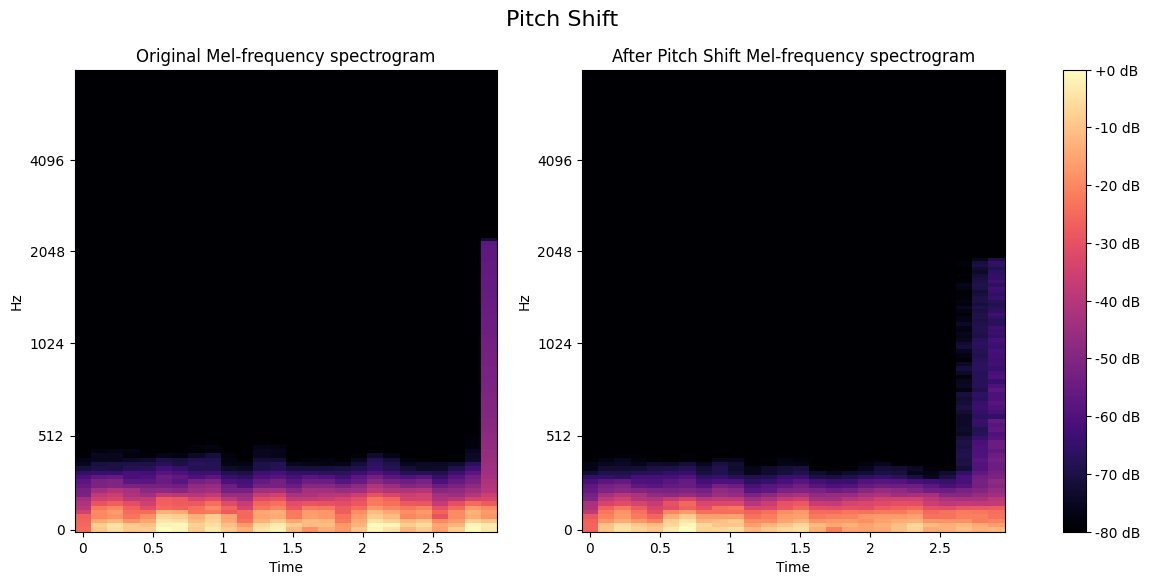

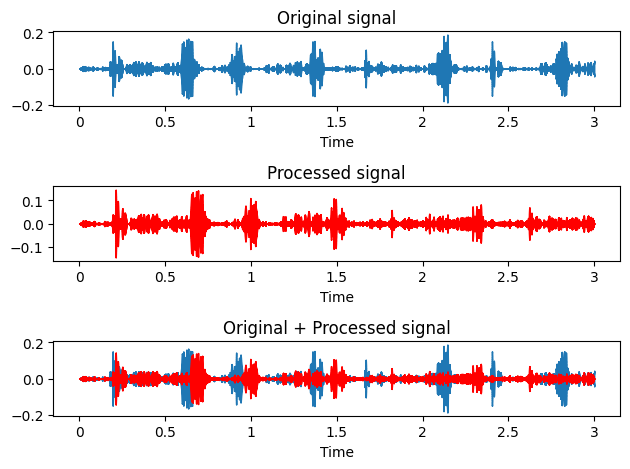

In [ ]:
Original_signal_path =  "/content/drive/MyDrive/Project/DATA_2_splitted/set_A/Atraining_normal/Atraining_normal_201106221418_0.wav"
Processed_signal_path = "/content/drive/MyDrive/Project/DATA_2_splitted/set_A_augm_1/Atraining_normal/Atraining_normal_201106221418_0_pitch.wav"

original_signal, sr0 = librosa.load(Original_signal_path, sr=None)
processed_signal, sr1 = librosa.load(Processed_signal_path, sr=None)

# print(original_signal)
# print(len(original_signal))
# print(sr0)
# print('')


# print(processed_signal)
# print(len(processed_signal))
# print(sr1)
# print('')

# print(original_signal==processed_signal)

text_for_title= "Pitch Shift"
plot_original_and_processed_melspec(original_signal, processed_signal, sr0, sr1, text_for_title)
plot_original_and_processed_signal_waveform(original_signal, processed_signal, sr0, sr1)

Time Shift

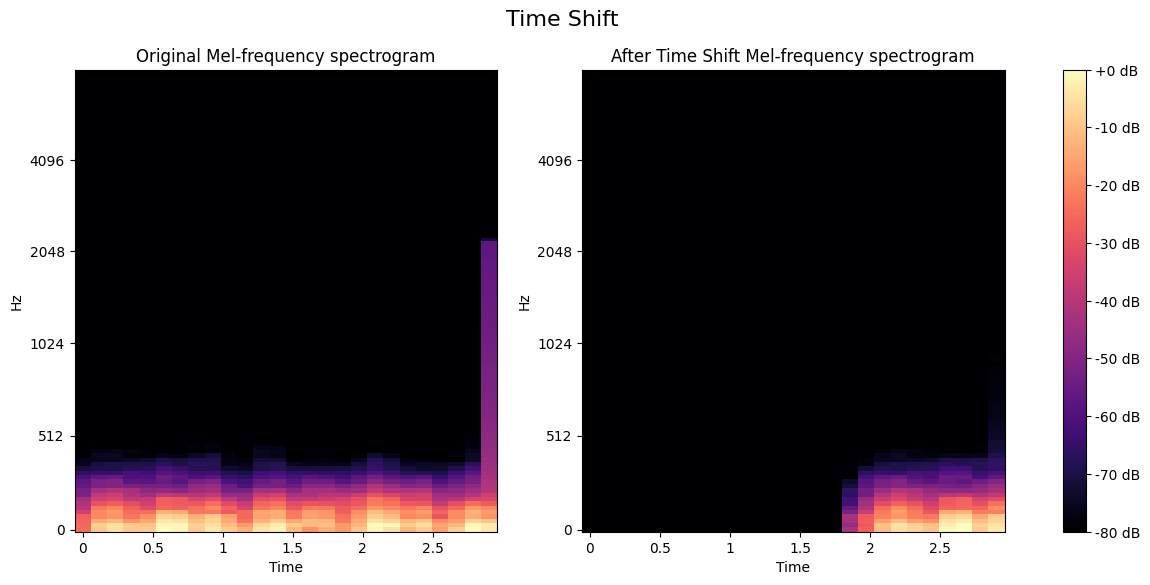

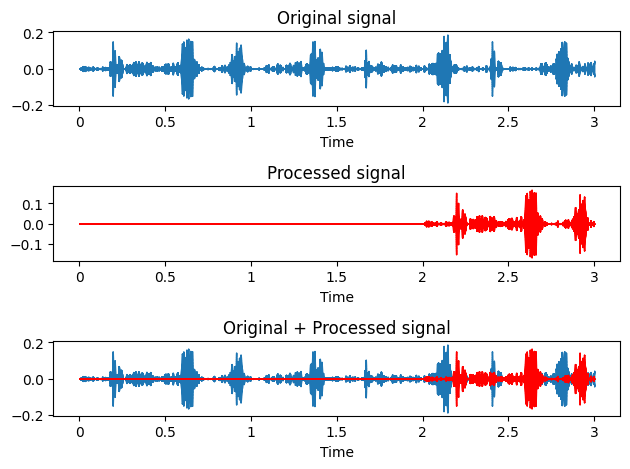

In [ ]:
Original_signal_path =  "/content/drive/MyDrive/Project/DATA_2_splitted/set_A/Atraining_normal/Atraining_normal_201106221418_0.wav"
Processed_signal_path = "/content/drive/MyDrive/Project/DATA_2_splitted/set_A_augm_2/Atraining_normal/Atraining_normal_201106221418_0_timeshift.wav"

original_signal, sr0 = librosa.load(Original_signal_path, sr=None)
processed_signal, sr1 = librosa.load(Processed_signal_path, sr=None)

# print(original_signal)
# print(len(original_signal))
# print(sr0)
# print('')


# print(processed_signal)
# print(len(processed_signal))
# print(sr1)
# print('')

# print(original_signal==processed_signal)

text_for_title= "Time Shift"
plot_original_and_processed_melspec(original_signal, processed_signal, sr0, sr1, text_for_title)
plot_original_and_processed_signal_waveform(original_signal, processed_signal, sr0, sr1)

# DRAFTS

In [ ]:
# set_A_folder = "/content/drive/MyDrive/Project/test_for_input/Aset"
# output_folder_A = "/content/drive/MyDrive/Project/test_output"
# test_func(set_A_folder, output_folder_A)

In [ ]:
os.listdir("/content/drive/MyDrive/Project/DATA_2_splitted/set_A")
data_path = "/content/drive/MyDrive/Project/DATA_2_splitted/"
A0 = "set_A"
A1 ="set_A_augm_1"
A2 = "set_A_augm_2"

#A0

A_normal_data0     = data_path + A0 + '/Atraining_normal/'
A_murmur_data0    = data_path + A0 +'/Atraining_murmur/'
A_artifact_data0   = data_path + A0+ '/Atraining_artifact/'
A_extrahls_data0   = data_path + A0+ "/Atraining_extrahs/"

# labels = np.array(['normal','murmur','artifact','extrahls']) #,'extrastole'
# counts = np.array([len(os.listdir(A_normal_data0)),
#               len(os.listdir(A_murmur_data0)),
#               # len(os.listdir(A_extrastole_data)),
#               len(os.listdir(A_artifact_data0)),
#               len(os.listdir(A_extrahls_data0))])

df_train_data_A0 = pd.DataFrame({'labels':labels, 'A':counts})
# df_train_data_A0

#A1

A_normal_data1     = data_path + A1 + '/Atraining_normal/'
A_murmur_data1    = data_path + A1 +'/Atraining_murmur/'
A_artifact_data1   = data_path + A1+ '/Atraining_artifact/'
A_extrahls_data1   = data_path + A1+ "/Atraining_extrahs/"

labels = np.array(['normal','murmur','artifact','extrahls']) #,'extrastole'
counts = np.array([len(os.listdir(A_normal_data1)),
              len(os.listdir(A_murmur_data1)),
              # len(os.listdir(A_extrastole_data)),
              len(os.listdir(A_artifact_data1)),
              len(os.listdir(A_extrahls_data1))])

df_train_data_A1 = pd.DataFrame({'labels':labels, 'A_pitch_shiftted':counts})
# df_train_data_A1

#A2

A_normal_data2     = data_path + A2 + '/Atraining_normal/'
A_murmur_data2    = data_path + A2 +'/Atraining_murmur/'
A_artifact_data2   = data_path + A2+ '/Atraining_artifact/'
A_extrahls_data2   = data_path + A2+ "/Atraining_extrahs/"

labels = np.array(['normal','murmur','artifact','extrahls']) #,'extrastole'
counts = np.array([len(os.listdir(A_normal_data2)),
              len(os.listdir(A_murmur_data2)),
              # len(os.listdir(A_extrastole_data)),
              len(os.listdir(A_artifact_data2)),
              len(os.listdir(A_extrahls_data2))])

df_train_data_A2 = pd.DataFrame({'labels':labels, 'A_time_shiftted':counts})
df_train_data_A2

df_train_A= pd.merge(df_train_data_A0, df_train_data_A1, on='labels', how='inner')
df_train_A= pd.merge(df_train_A, df_train_data_A2, on='labels', how='inner')
df_train_A
df_train_A['sum'] = df_train_A.sum(axis=1)
df_train_A['%']= round(df_train_A['sum']/df_train_A['sum'].sum(),2)
df_train_A

<ipython-input-40-93cf0bb4b421>:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train_A['sum'] = df_train_A.sum(axis=1)


,labels,A,A_pitch_shiftted,A_time_shiftted,sum,%
0,normal,68,68,68,204,0.23
1,murmur,66,66,66,198,0.23
2,artifact,120,120,120,360,0.41
3,extrahls,37,37,37,111,0.13


In [ ]:
data_path =  '/content/drive/MyDrive/Project/DATA_2_splitted/set_B'

B_unlabel_data    = data_path  + "/Bunlabelledtest/"

B_normal_data     = data_path + '/Btraining_normal/'
B_murmur_data     = data_path + '/Btraining_murmur/'
B_extrastole_data = data_path + '/Btraining_extrasystole/'

labels = np.array(['normal','murmur','extrastole'])
counts = np.array([len(os.listdir(B_normal_data)),
              len(os.listdir(B_murmur_data)),
              len(os.listdir(B_extrastole_data))])

df_train_data_B = pd.DataFrame({'labels':labels, 'value':counts})
# df_train_data_B['%'] = df_train_A['value'].sum()
# df_train_data_B
df_train_data_B['%']= round(df_train_data_B['value']/df_train_data_B ['value'].sum(),2)
df_train_data_B

,labels,value,%
0,normal,495,0.65
1,murmur,197,0.26
2,extrastole,64,0.08


In [ ]:
ipd.Audio(signal,rate=sr)

In [ ]:
ipd.Audio(augmented_signal,rate=sr)

In [ ]:
os.listdir("/content/drive/MyDrive/Project/DATA_2_splitted/set_A")
data_path = "/content/drive/MyDrive/Project/DATA_2_splitted/"

for subfolder in data_path:
  print("len of"+subfolder+" is"  len(os.listdir(subfolder)))

SyntaxError: ignored